In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv('moisture_damage.csv') 
data = data.dropna(axis=0, how='any', inplace=False)
data = data.drop(columns=['Reference']) 
data_encoded = pd.get_dummies(data, columns=['Gradation', 'Binder type', 'Aggregate type'])
# Prepare the data
X = data_encoded.drop(columns=['Dry ITS(kPa)', 'Wet ITS (kPa)', 'TSR (%)'])
y = data[['Dry ITS(kPa)', 'Wet ITS (kPa)', 'TSR (%)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree regressor for Dry ITS
dry_its_regressor = DecisionTreeRegressor()
dry_its_regressor.fit(X_train, y_train['Dry ITS(kPa)'])

# Make predictions for Dry ITS
dry_its_predictions = dry_its_regressor.predict(X_test)

# Evaluate the model for Dry ITS
dry_its_mse = mean_squared_error(y_test['Dry ITS(kPa)'], dry_its_predictions)
dry_its_mae = mean_absolute_error(y_test['Dry ITS(kPa)'], dry_its_predictions)
print("Dry ITS Mean Squared Error:", dry_its_mse)
print("Dry ITS Mean Absolute Error:", dry_its_mae)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test['Dry ITS(kPa)'],dry_its_regressor.predict(X_test)))

Dry ITS Mean Squared Error: 47094.833333333336
Dry ITS Mean Absolute Error: 135.5
0.3333333333333333


In [25]:
def calculate_mape(y_true, y_pred):
    absolute_errors = abs(y_true - y_pred)
    percentage_errors = (absolute_errors / y_true) * 100
    mape = percentage_errors.mean()
    return mape


In [26]:
calculate_mape(y_test['Dry ITS(kPa)'], dry_its_predictions)

14.640198136581398

# Predictions of dry ITS (KPA) 

In [5]:
dry_its_predictions

array([1000.,  880.,  880.,  743.,  880., 1020.])

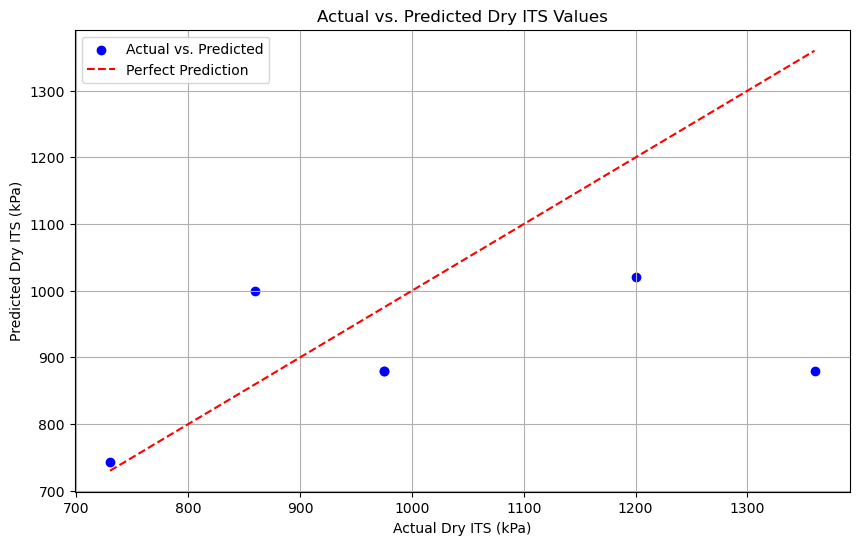

In [6]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted Dry ITS values
plt.figure(figsize=(10, 6))
plt.scatter(y_test['Dry ITS(kPa)'], dry_its_predictions, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test['Dry ITS(kPa)']), max(y_test['Dry ITS(kPa)'])], [min(y_test['Dry ITS(kPa)']), max(y_test['Dry ITS(kPa)'])], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Dry ITS (kPa)')
plt.ylabel('Predicted Dry ITS (kPa)')
plt.title('Actual vs. Predicted Dry ITS Values')
plt.legend()
plt.grid(True)
plt.show()


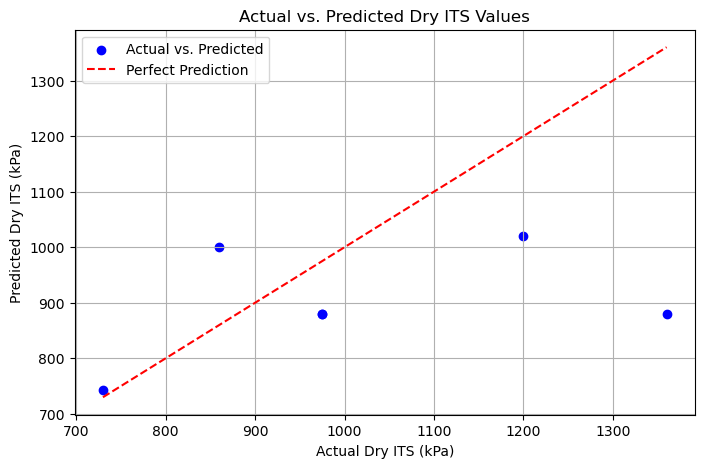

In [23]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted Dry ITS values
plt.figure(figsize=(8, 5))
# Increase the sampling rate by using every nth data point
n = 1  # Change this value to adjust the sampling rate
plt.scatter(y_test['Dry ITS(kPa)'][::n], dry_its_predictions[::n], color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test['Dry ITS(kPa)']), max(y_test['Dry ITS(kPa)'])], [min(y_test['Dry ITS(kPa)']), max(y_test['Dry ITS(kPa)'])], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Dry ITS (kPa)')
plt.ylabel('Predicted Dry ITS (kPa)')
plt.title('Actual vs. Predicted Dry ITS Values')
plt.legend()
plt.grid(True)
plt.show()



# Predictions of wet ITS(kpa)

In [12]:
wet_its_regressor = DecisionTreeRegressor()
wet_its_regressor.fit(X_train, y_train['Wet ITS (kPa)'])

# Make predictions for wet ITS
wet_its_predictions = wet_its_regressor.predict(X_test)

# Evaluate the model for Dry ITS
wet_its_mse = mean_squared_error(y_test['Wet ITS (kPa)'], wet_its_predictions)
wet_its_mae = mean_absolute_error(y_test['Wet ITS (kPa)'], wet_its_predictions)
print("Dry ITS Mean Squared Error:", wet_its_mse)
print("Dry ITS Mean Absolute Error:", wet_its_mae)

Dry ITS Mean Squared Error: 45081.444444444445
Dry ITS Mean Absolute Error: 152.44444444444443


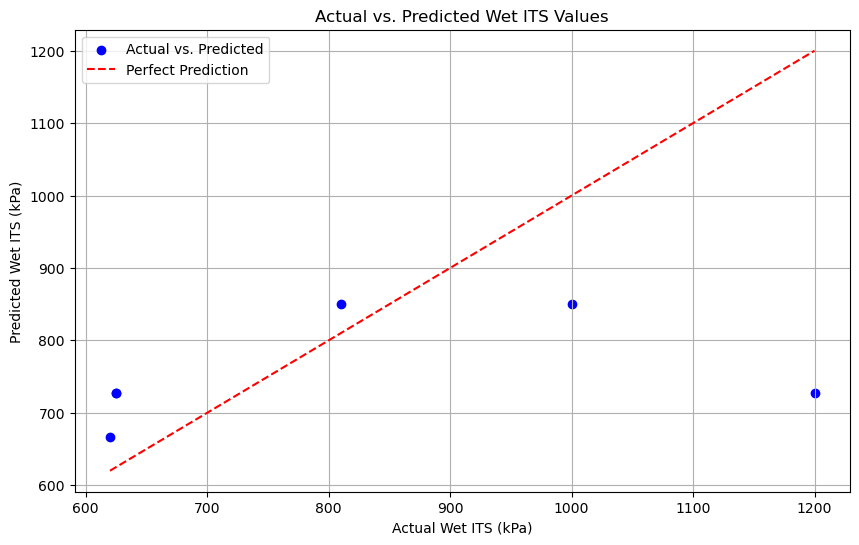

In [15]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted wet ITS values
plt.figure(figsize=(10, 6))
plt.scatter(y_test['Wet ITS (kPa)'], wet_its_predictions, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test['Wet ITS (kPa)']), max(y_test['Wet ITS (kPa)'])], [min(y_test['Wet ITS (kPa)']), max(y_test['Wet ITS (kPa)'])], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Wet ITS (kPa)')
plt.ylabel('Predicted Wet ITS (kPa)')
plt.title('Actual vs. Predicted Wet ITS Values')
plt.legend()
plt.grid(True)
plt.show()

# Predictions of TSR values

In [18]:
TSR_regressor = DecisionTreeRegressor()
TSR_regressor.fit(X_train, y_train['TSR (%)'])

# Make predictions for TSR 
TSR_predictions = TSR_regressor.predict(X_test)

# Evaluate the model for TSR
TSR_mse = mean_squared_error(y_test['TSR (%)'], TSR_predictions)
TSR_mae = mean_absolute_error(y_test['TSR (%)'], TSR_predictions)
print("TSR Mean Squared Error:", TSR_mse)
print("TSR ITS Mean Absolute Error:", TSR_mae)

TSR Mean Squared Error: 51.296296296296305
TSR ITS Mean Absolute Error: 5.111111111111112


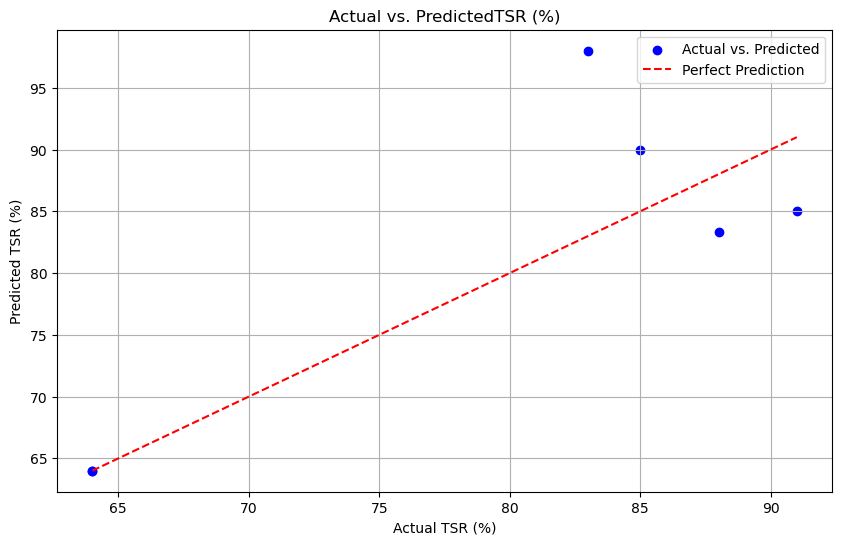

In [19]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted wet ITS values
plt.figure(figsize=(10, 6))
plt.scatter(y_test['TSR (%)'], TSR_predictions, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test['TSR (%)']), max(y_test['TSR (%)'])], [min(y_test['TSR (%)']), max(y_test['TSR (%)'])], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual TSR (%)')
plt.ylabel('Predicted TSR (%)')
plt.title('Actual vs. PredictedTSR (%)')
plt.legend()
plt.grid(True)
plt.show()

The DT algorithm is an estimator that creates classification or prediction rules for a variable . The leaf nodes, root node, and branches make up the major components of a DT. The process begins with the root node, which is divided into two leaves two and branches nodes that further will also be subdivided based on a threshold. This criterion takes into account every aspect of the model with the goal of minimizing the cost-function

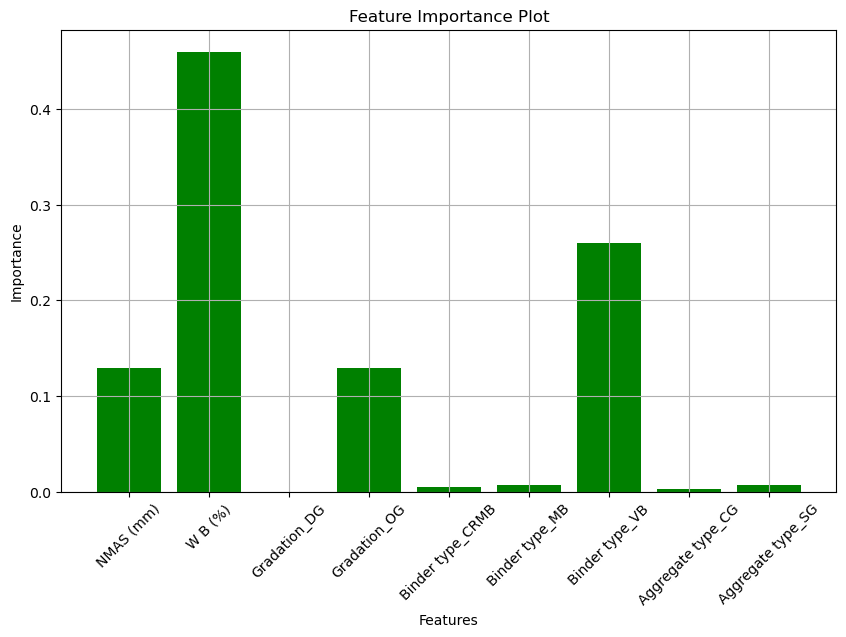

In [8]:
feature_importances = dry_its_regressor.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color='green')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

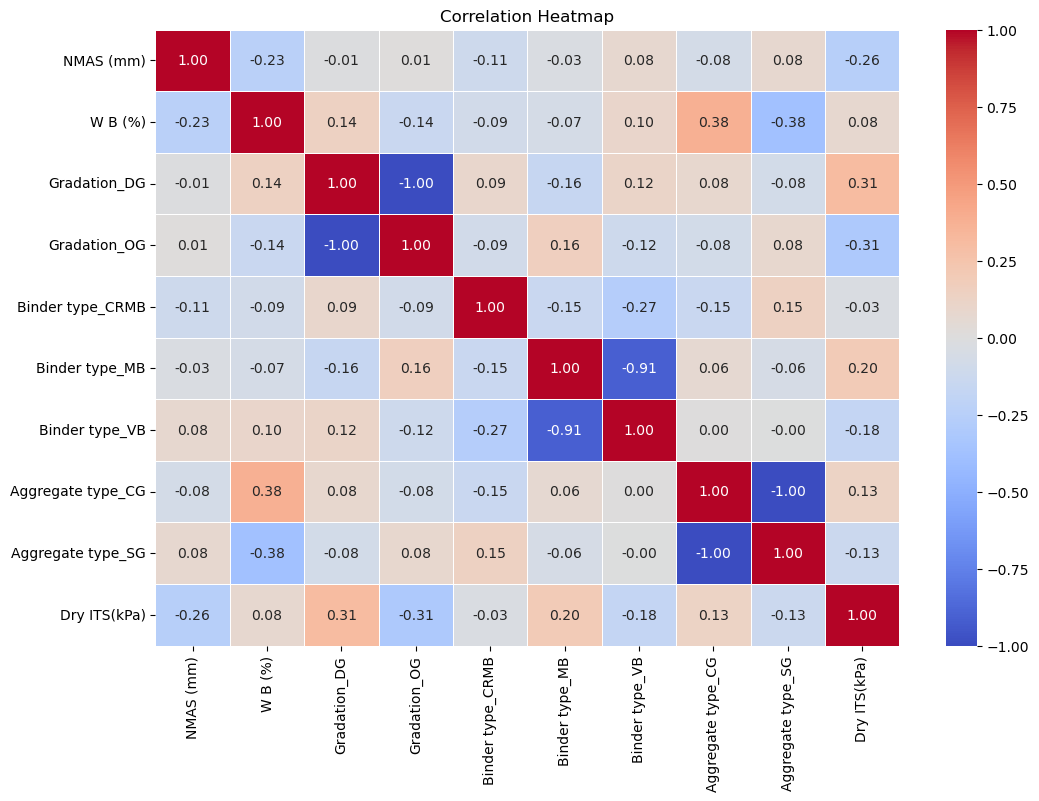

In [12]:
import seaborn as sns

# Concatenate the features and target variable for the correlation analysis
data_corr = pd.concat([X_train, y_train['Dry ITS(kPa)']], axis=1)

# Compute the correlation matrix
corr_matrix = data_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


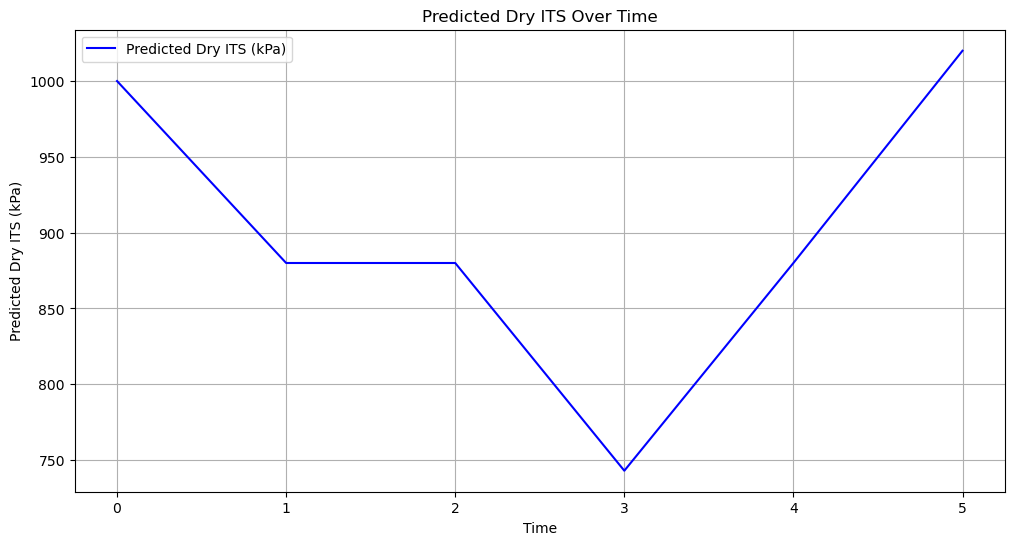

In [13]:
import matplotlib.pyplot as plt

# Assuming 'time' is your time variable (e.g., date or timestamp)
# If you don't have a time variable, you can use index as a proxy for time
time = range(len(dry_its_predictions))  

# Plot predicted Dry ITS values over time
plt.figure(figsize=(12, 6))
plt.plot(time, dry_its_predictions, color='blue', label='Predicted Dry ITS (kPa)')
plt.xlabel('Time')
plt.ylabel('Predicted Dry ITS (kPa)')
plt.title('Predicted Dry ITS Over Time')
plt.legend()
plt.grid(True)
plt.show()


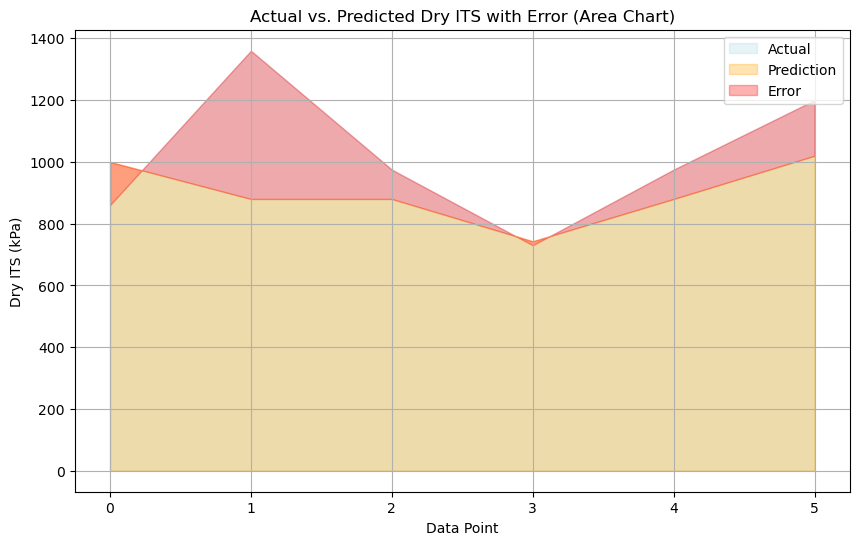

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data (replace this with your actual data)
x = np.arange(len(y_test))
actual_values = y_test['Dry ITS(kPa)']
predicted_values = dry_its_predictions
error_values = actual_values - predicted_values

# Plot
plt.figure(figsize=(10, 6))

# Plot area chart for actual data
plt.fill_between(x, actual_values, color='lightblue', alpha=0.3, label='Actual')

# Plot area chart for predicted values
plt.fill_between(x, predicted_values, color='orange', alpha=0.3, label='Prediction')

# Plot area chart for errors
plt.fill_between(x, predicted_values, predicted_values + error_values, color='red', alpha=0.3, label='Error')

plt.xlabel('Data Point')
plt.ylabel('Dry ITS (kPa)')
plt.title('Actual vs. Predicted Dry ITS with Error (Area Chart)')
plt.legend()
plt.grid(True)
plt.show()


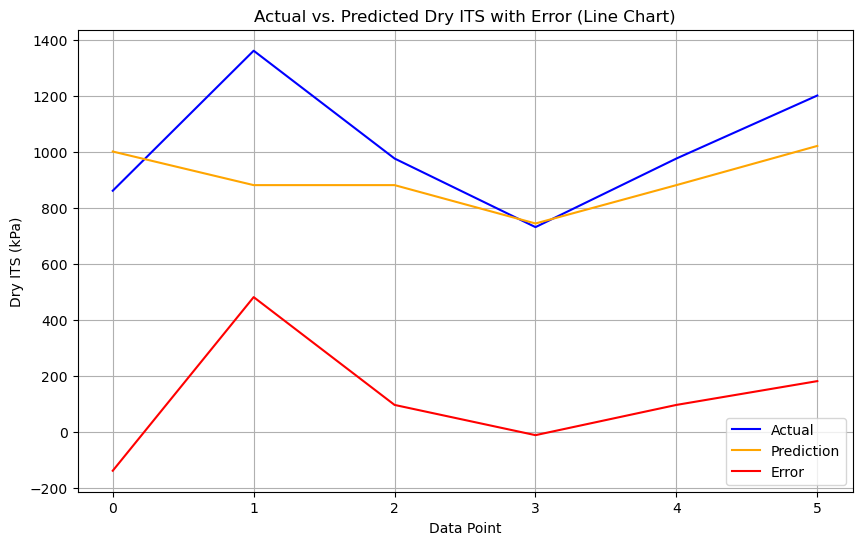

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data (replace this with your actual data)
x = np.arange(len(y_test))
actual_values = y_test['Dry ITS(kPa)']
predicted_values = dry_its_predictions
error_values = actual_values - predicted_values

# Plot
plt.figure(figsize=(10, 6))

# Plot actual data as a line chart
plt.plot(x, actual_values, color='blue', label='Actual')

# Plot predicted values as a line chart
plt.plot(x, predicted_values, color='orange', label='Prediction')

# Plot errors as a line chart
plt.plot(x, error_values, color='red', label='Error')

plt.xlabel('Data Point')
plt.ylabel('Dry ITS (kPa)')
plt.title('Actual vs. Predicted Dry ITS with Error (Line Chart)')
plt.legend()
plt.grid(True)
plt.show()


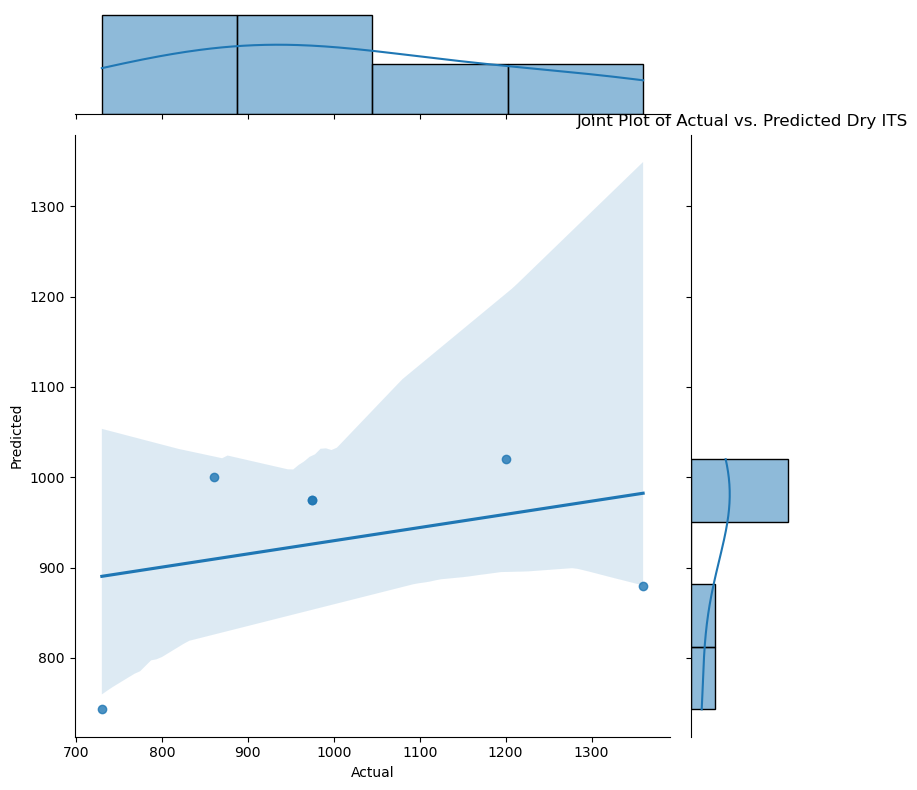

In [30]:
import seaborn as sns

# Create a DataFrame with actual and predicted values
predictions_df = pd.DataFrame({'Actual': y_test['Dry ITS(kPa)'], 'Predicted': dry_its_predictions})

# Create a joint plot
sns.jointplot(x='Actual', y='Predicted', data=predictions_df, kind='reg', height=8)
plt.xlabel('Actual Dry ITS (kPa)')
plt.ylabel('Predicted Dry ITS (kPa)')
plt.title('Joint Plot of Actual vs. Predicted Dry ITS')
plt.show()


In [31]:
{
  const data = [
    { x: 1, y: 10 },
    { x: 2, y: 20 },
    { x: 3, y: 30 },
    { x: 4, y: 40 },
    { x: 5, y: 50 }
  ];

  const svg = d3.select(DOM.svg(400, 200));

  svg.selectAll("circle")
    .data(data)
    .enter().append("circle")
      .attr("cx", d => d.x * 40)
      .attr("cy", d => 200 - d.y)
      .attr("r", 5)
      .attr("fill", "steelblue");

  return svg.node();
}


SyntaxError: invalid syntax (671974874.py, line 2)